# Data Check

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("./fuel-prices.csv", names=["Date", "Name", "Price"], sep=";")
display(data)
display(data.info())

,Date,Name,Price
0,2022-06-18T14:40:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
1,2022-06-18T15:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
2,2022-06-18T16:00:02+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
3,2022-06-18T17:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
4,2022-06-18T18:00:01+02:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034
...,...,...,...
6977,2023-04-05T07:30:01+02:00,AVIA XPress TS Raml,1.553
6978,2023-04-05T08:30:01+02:00,AVIA XPress TS Raml,1.543
6979,2023-04-05T09:30:02+02:00,AVIA XPress TS Raml,1.543
6980,2023-04-05T10:30:01+02:00,AVIA XPress TS Raml,1.542


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6982 non-null   object 
 1   Name    6978 non-null   object 
 2   Price   6976 non-null   float64
dtypes: float64(1), object(2)
memory usage: 163.8+ KB


None

In [3]:
data["Date"] = pd.to_datetime(data["Date"], utc=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    6982 non-null   datetime64[ns, UTC]
 1   Name    6978 non-null   object             
 2   Price   6976 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 163.8+ KB


In [4]:
data[data.isnull().any(axis=1)]

,Date,Name,Price
22,2022-06-19 10:00:01+00:00,OMV - Engerwitzdorf Freistädter Straße 50,NaN
46,2022-06-20 10:00:02+00:00,OMV - Engerwitzdorf Freistädter Straße 50,NaN
914,2022-07-26 14:30:18+00:00,NaN,NaN
5729,2023-02-12 05:32:10+00:00,NaN,NaN
5732,2023-02-12 08:32:11+00:00,NaN,NaN
5813,2023-02-15 17:30:01+00:00,NaN,NaN


# Drop faulty rows

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

Date     0
Name     0
Price    0
dtype: int64

# Extract more information out of "Date" column

In [7]:
data["Day Of Week"] = data["Date"].dt.day_name()
data["Day Of Month"] = data["Date"].dt.day
data["Month"] = data["Date"].dt.month_name()
data["Week Of Year"] = data["Date"].dt.isocalendar().week
data["Day Of Year"] = data["Date"].dt.dayofyear
data["Year"] = data["Date"].dt.year
data

,Date,Name,Price,Day Of Week,Day Of Month,Month,Week Of Year,Day Of Year,Year
0,2022-06-18 12:40:01+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,18,June,24,169,2022
1,2022-06-18 13:00:01+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,18,June,24,169,2022
2,2022-06-18 14:00:02+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,18,June,24,169,2022
3,2022-06-18 15:00:01+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,18,June,24,169,2022
4,2022-06-18 16:00:01+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,2.034,Saturday,18,June,24,169,2022
...,...,...,...,...,...,...,...,...,...
6977,2023-04-05 05:30:01+00:00,AVIA XPress TS Raml,1.553,Wednesday,5,April,14,95,2023
6978,2023-04-05 06:30:01+00:00,AVIA XPress TS Raml,1.543,Wednesday,5,April,14,95,2023
6979,2023-04-05 07:30:02+00:00,AVIA XPress TS Raml,1.543,Wednesday,5,April,14,95,2023
6980,2023-04-05 08:30:01+00:00,AVIA XPress TS Raml,1.542,Wednesday,5,April,14,95,2023


# Overall plot

<Axes: xlabel='Date', ylabel='Price'>

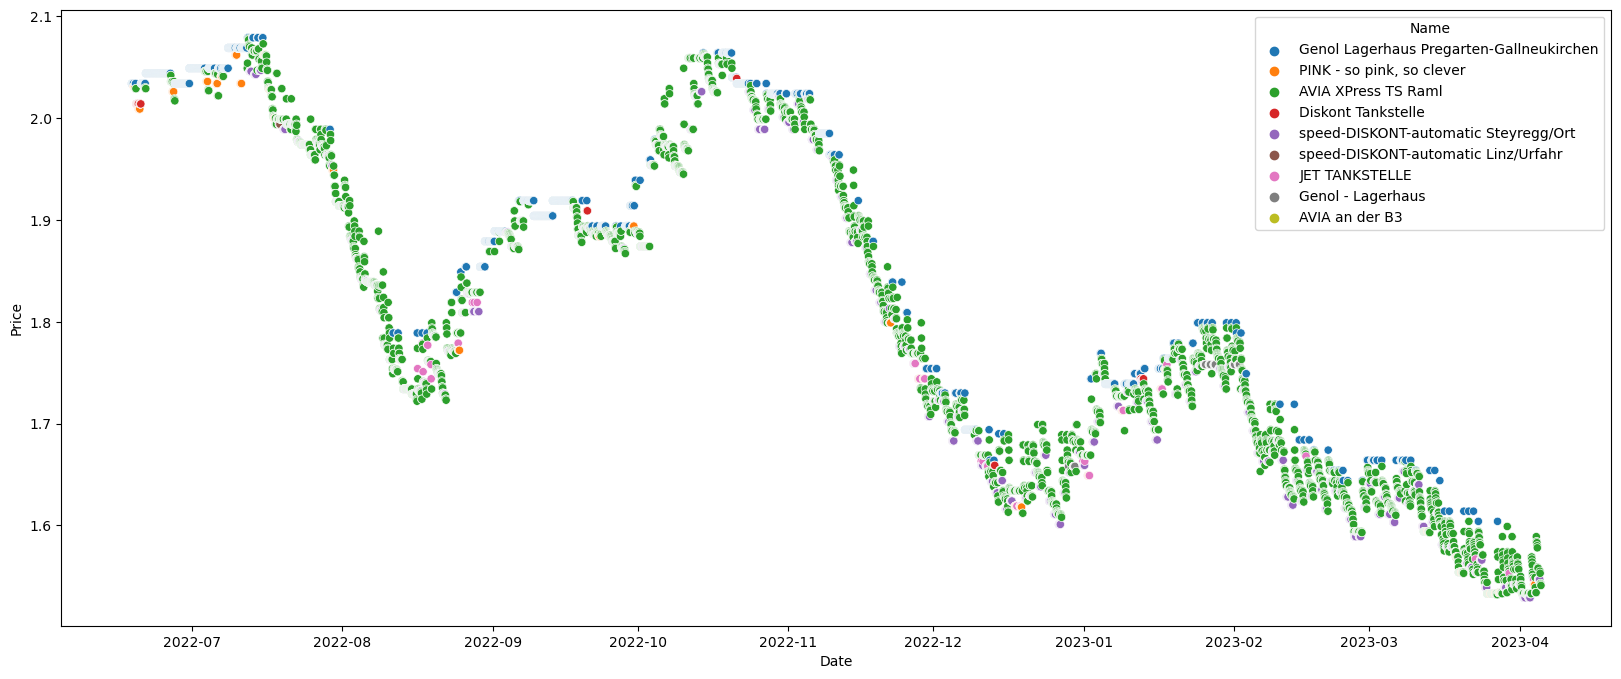

In [8]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data, x="Date", y="Price", hue="Name")

<Axes: xlabel='Date', ylabel='Price'>

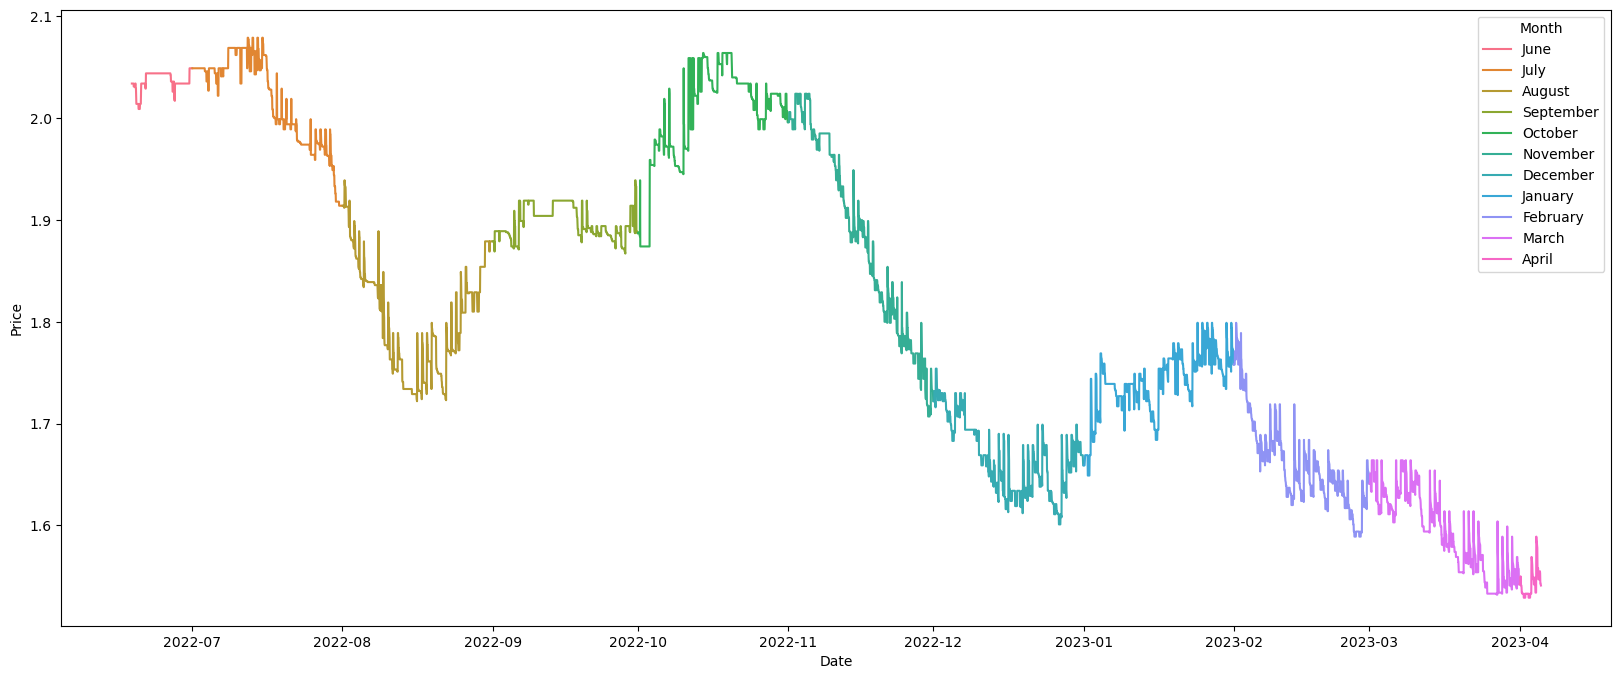

In [9]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data, x="Date", y="Price", hue="Month")

# Last week plot

<Axes: xlabel='Date', ylabel='Price'>

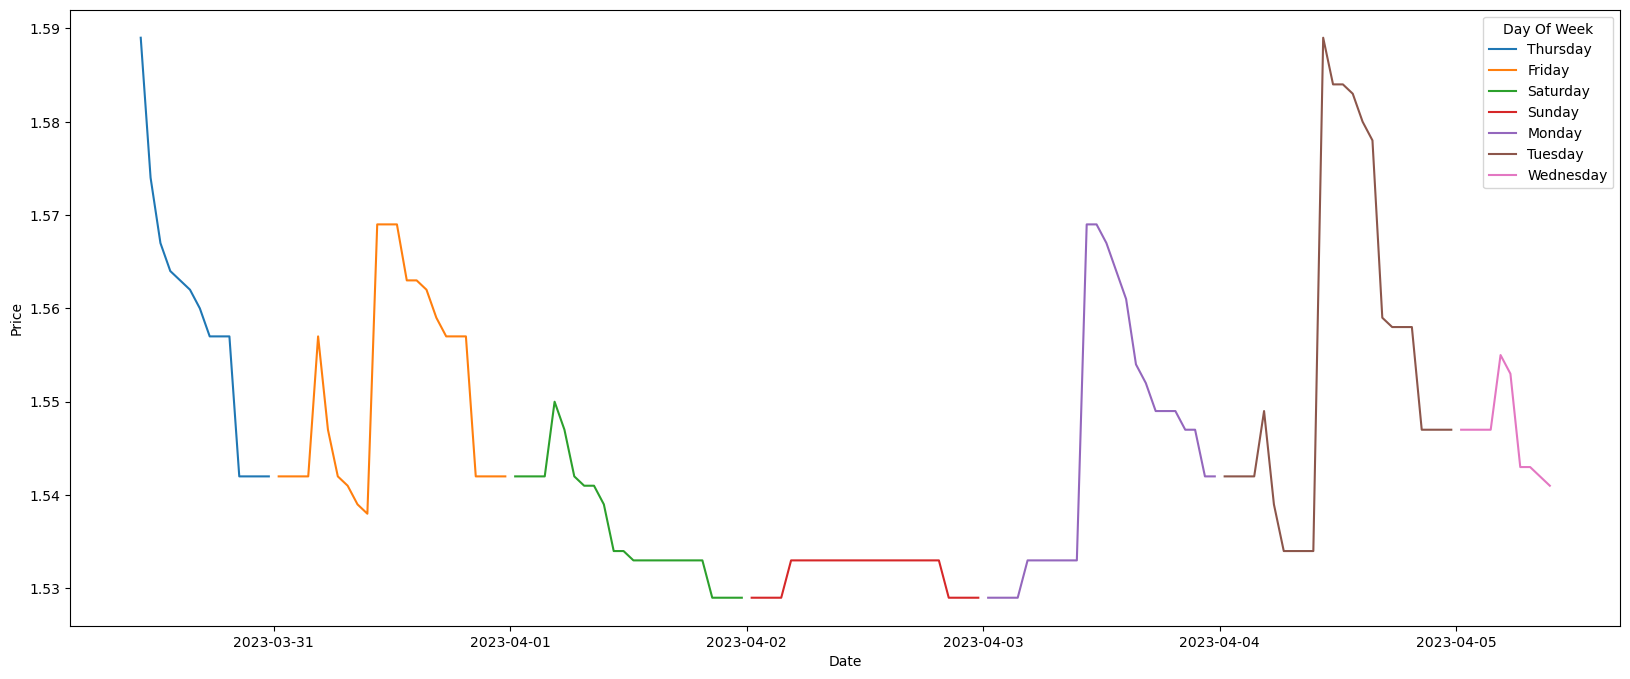

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data.tail(144), x="Date", y="Price", hue="Day Of Week")

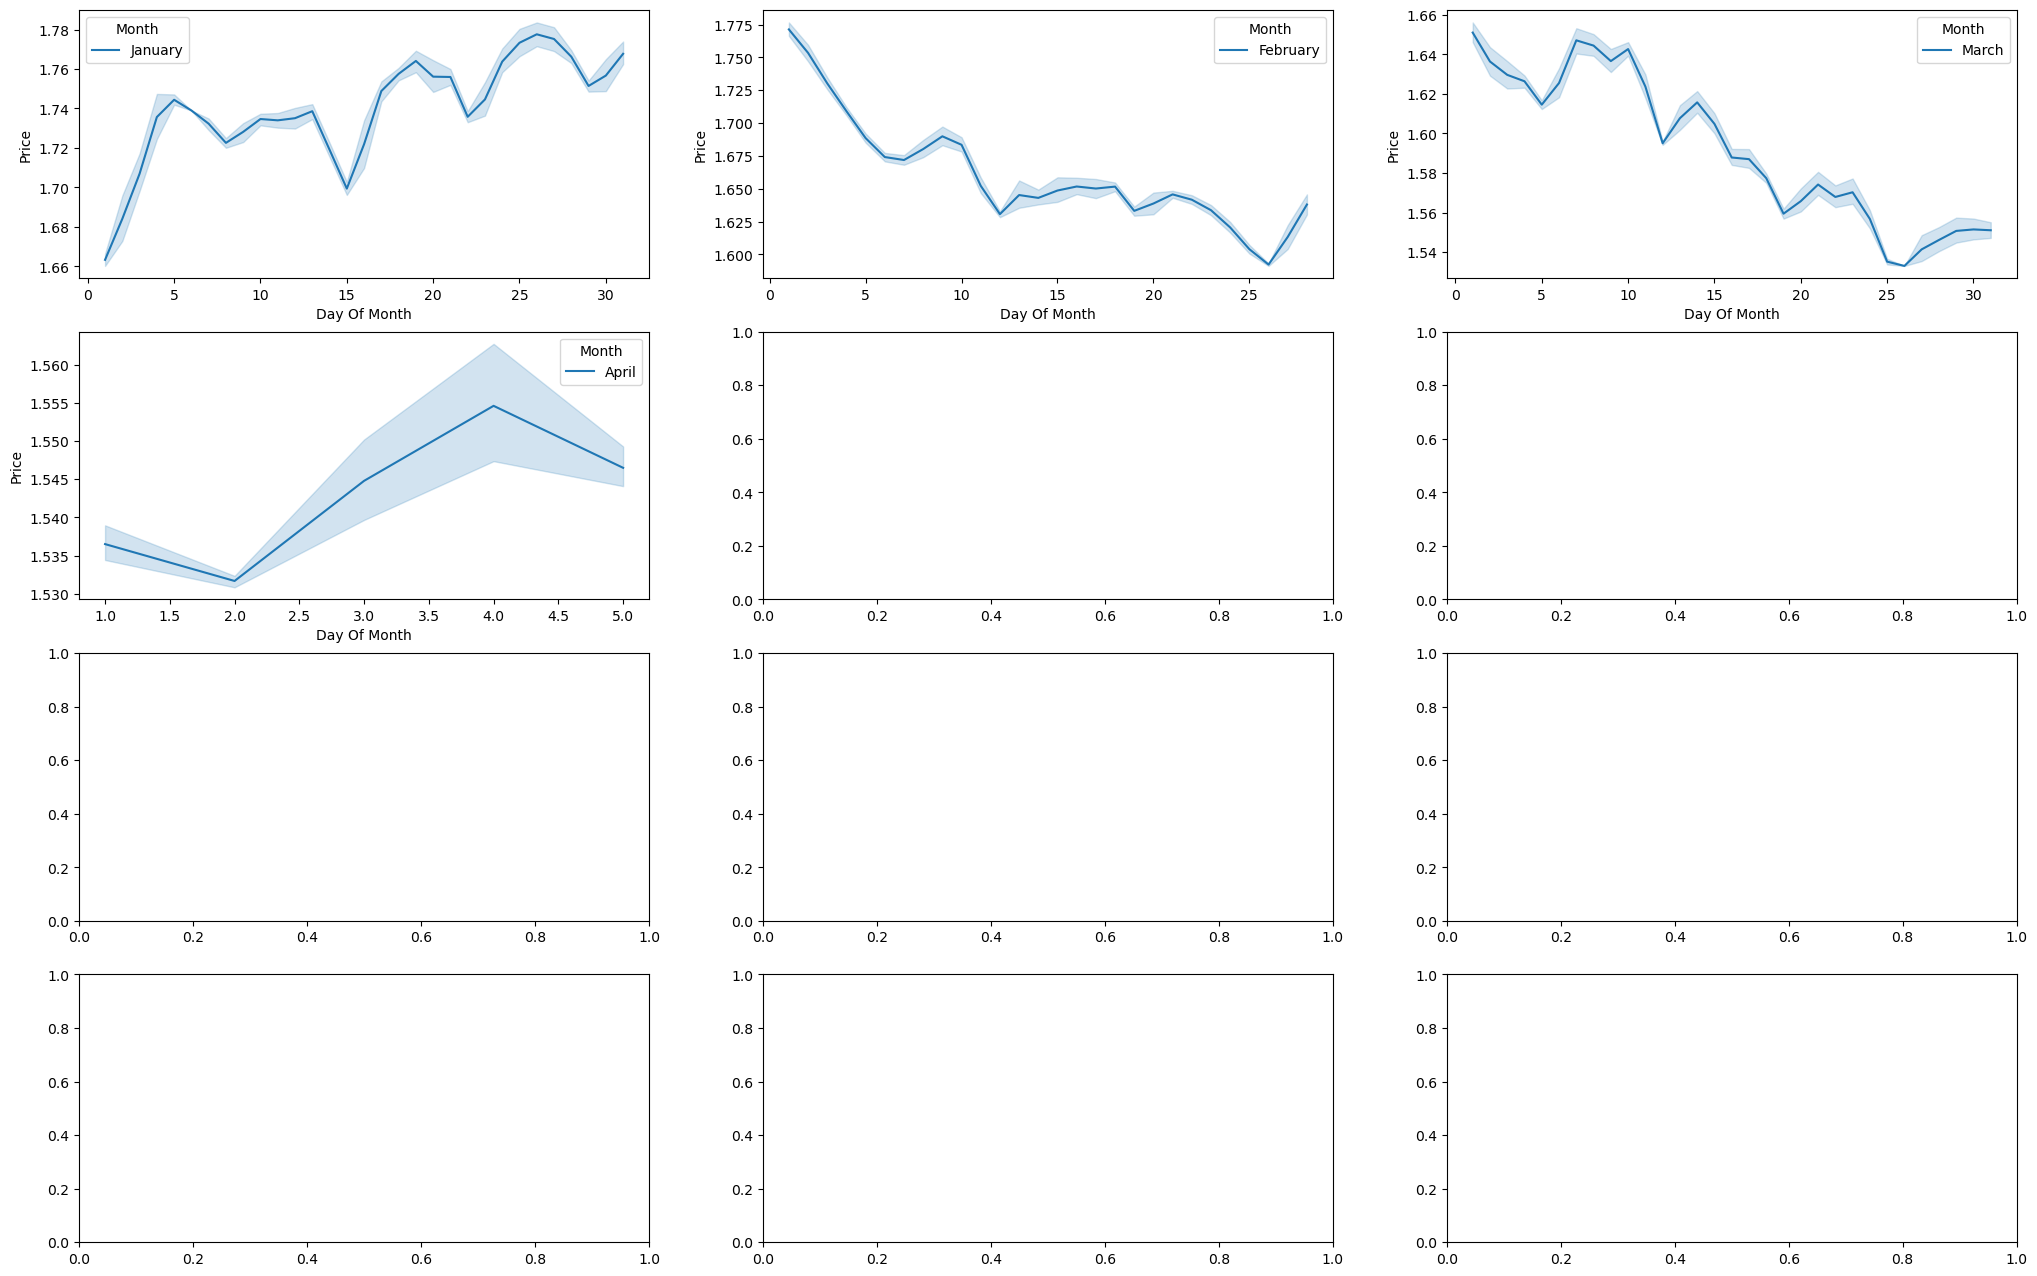

In [11]:
fig, axs = plt.subplots(4,3,figsize=(25,16))

year = 2023

months = [
    
    ((0,0), "January"), 
    ((0,1), "February"), 
    ((0,2), "March"), 
    ((1,0), "April"), 
    ((1,1), "May"), 
    ((1,2), "June"), 
    ((2,0), "July"), 
    ((2,1), "August"), 
    ((2,2), "September"), 
    ((3,0), "October"),
    ((3,1), "November"),
    ((3,2), "December"),
]

for pos, month in months:
    sns.lineplot(data=data[(data["Month"] == month) & (data["Year"] == year)], x="Day Of Month", y="Price", hue="Month", ax=axs[pos])

# Min price for each day

In [12]:
min_price_day_of_year = data.loc[data.groupby(["Day Of Year"]).Price.idxmin()]
min_price_day_of_year

,Date,Name,Price,Day Of Week,Day Of Month,Month,Week Of Year,Day Of Year,Year
4736,2023-01-01 20:30:01+00:00,JET TANKSTELLE,1.649,Sunday,1,January,52,1,2023
4740,2023-01-02 00:30:02+00:00,"PINK - so pink, so clever",1.649,Monday,2,January,1,2,2023
4764,2023-01-03 00:30:01+00:00,speed-DISKONT-automatic Steyregg/Ort,1.682,Tuesday,3,January,1,3,2023
4798,2023-01-04 10:30:01+00:00,AVIA XPress TS Raml,1.701,Wednesday,4,January,1,4,2023
4823,2023-01-05 11:30:02+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,1.739,Thursday,5,January,1,5,2023
...,...,...,...,...,...,...,...,...,...
4596,2022-12-27 00:30:01+00:00,speed-DISKONT-automatic Steyregg/Ort,1.601,Tuesday,27,December,52,361,2022
4630,2022-12-28 10:30:01+00:00,AVIA XPress TS Raml,1.627,Wednesday,28,December,52,362,2022
4644,2022-12-29 00:30:02+00:00,speed-DISKONT-automatic Steyregg/Ort,1.652,Thursday,29,December,52,363,2022
4678,2022-12-30 10:30:01+00:00,AVIA XPress TS Raml,1.653,Friday,30,December,52,364,2022


# Max price for each day

In [13]:
max_price_day_of_year = data.loc[data.groupby(["Day Of Year"]).Price.idxmax()]
max_price_day_of_year

,Date,Name,Price,Day Of Week,Day Of Month,Month,Week Of Year,Day Of Year,Year
4722,2023-01-01 06:30:01+00:00,AVIA XPress TS Raml,1.669,Sunday,1,January,52,1,2023
4751,2023-01-02 11:30:02+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,1.744,Monday,2,January,1,2,2023
4775,2023-01-03 11:30:01+00:00,AVIA XPress TS Raml,1.749,Tuesday,3,January,1,3,2023
4799,2023-01-04 11:30:02+00:00,Genol Lagerhaus Pregarten-Gallneukirchen,1.769,Wednesday,4,January,1,4,2023
4817,2023-01-05 05:30:01+00:00,AVIA XPress TS Raml,1.759,Thursday,5,January,1,5,2023
...,...,...,...,...,...,...,...,...,...
4607,2022-12-27 11:30:01+00:00,AVIA XPress TS Raml,1.689,Tuesday,27,December,52,361,2022
4631,2022-12-28 11:30:01+00:00,AVIA XPress TS Raml,1.689,Wednesday,28,December,52,362,2022
4655,2022-12-29 11:30:01+00:00,AVIA XPress TS Raml,1.689,Thursday,29,December,52,363,2022
4679,2022-12-30 11:30:01+00:00,AVIA XPress TS Raml,1.699,Friday,30,December,52,364,2022


# Price each day incl. variation - Last year

<Axes: xlabel='Day Of Year', ylabel='Price'>

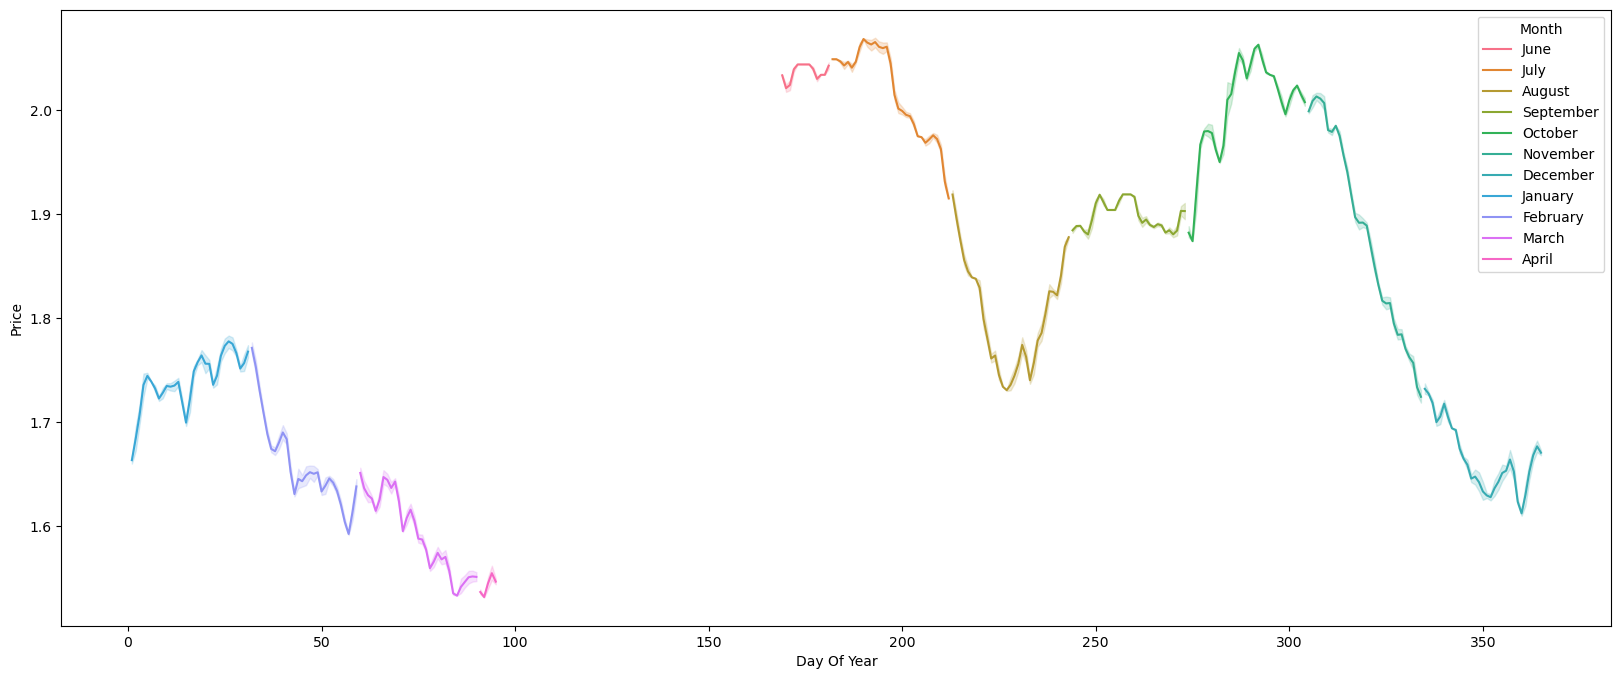

In [14]:
plt.figure(figsize=(20,8))
sns.lineplot(data=data.tail(24*(365-1)), x="Day Of Year", y="Price", hue="Month")

# Min price per week

In [15]:
min_price_week_of_year = data.loc[data.groupby(["Week Of Year"]).Price.idxmin()]
min_price_week_of_year

,Date,Name,Price,Day Of Week,Day Of Month,Month,Week Of Year,Day Of Year,Year
4740,2023-01-02 00:30:02+00:00,"PINK - so pink, so clever",1.649,Monday,2,January,1,2,2023
5073,2023-01-15 21:30:01+00:00,speed-DISKONT-automatic Steyregg/Ort,1.684,Sunday,15,January,2,15,2023
5076,2023-01-16 00:30:02+00:00,speed-DISKONT-automatic Steyregg/Ort,1.684,Monday,16,January,3,16,2023
5254,2023-01-23 10:30:01+00:00,AVIA XPress TS Raml,1.717,Monday,23,January,4,23,2023
5577,2023-02-05 21:30:01+00:00,speed-DISKONT-automatic Steyregg/Ort,1.671,Sunday,5,February,5,36,2023
5745,2023-02-12 21:30:02+00:00,speed-DISKONT-automatic Steyregg/Ort,1.620,Sunday,12,February,6,43,2023
5913,2023-02-19 21:30:01+00:00,speed-DISKONT-automatic Steyregg/Ort,1.616,Sunday,19,February,7,50,2023
6057,2023-02-25 21:30:01+00:00,speed-DISKONT-automatic Steyregg/Ort,1.589,Saturday,25,February,8,56,2023
6084,2023-02-27 00:30:01+00:00,speed-DISKONT-automatic Steyregg/Ort,1.589,Monday,27,February,9,58,2023
6401,2023-03-12 05:30:02+00:00,AVIA XPress TS Raml,1.594,Sunday,12,March,10,71,2023


<Axes: xlabel='Week Of Year', ylabel='Price'>

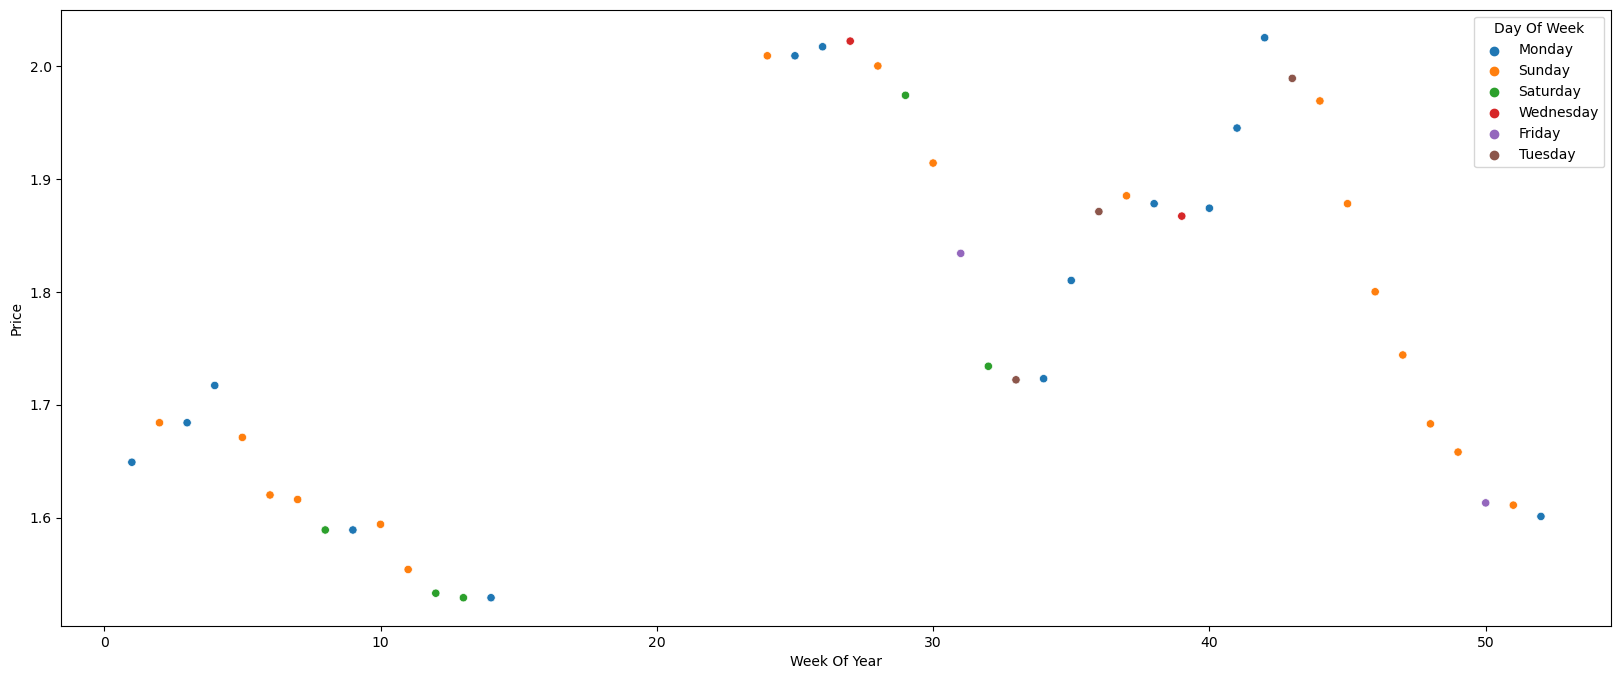

In [16]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=min_price_week_of_year.tail(52-1), x="Week Of Year", y="Price", hue="Day Of Week")

In [17]:
min_price_week_of_year.groupby(["Day Of Week"])["Price"].count().sort_values().reset_index(name='Counts')


,Day Of Week,Counts
0,Friday,2
1,Wednesday,2
2,Tuesday,3
3,Saturday,5
4,Monday,14
5,Sunday,17


In [18]:
mean_price_day_of_week = data.groupby(["Day Of Week"]).mean(numeric_only=True)["Price"].to_frame().reindex([ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
mean_price_day_of_week

,Price
Day Of Week,
Monday,1.806291
Tuesday,1.813604
Wednesday,1.818882
Thursday,1.821194
Friday,1.819821
Saturday,1.812341
Sunday,1.802611


<Axes: xlabel='Day Of Week', ylabel='Price'>

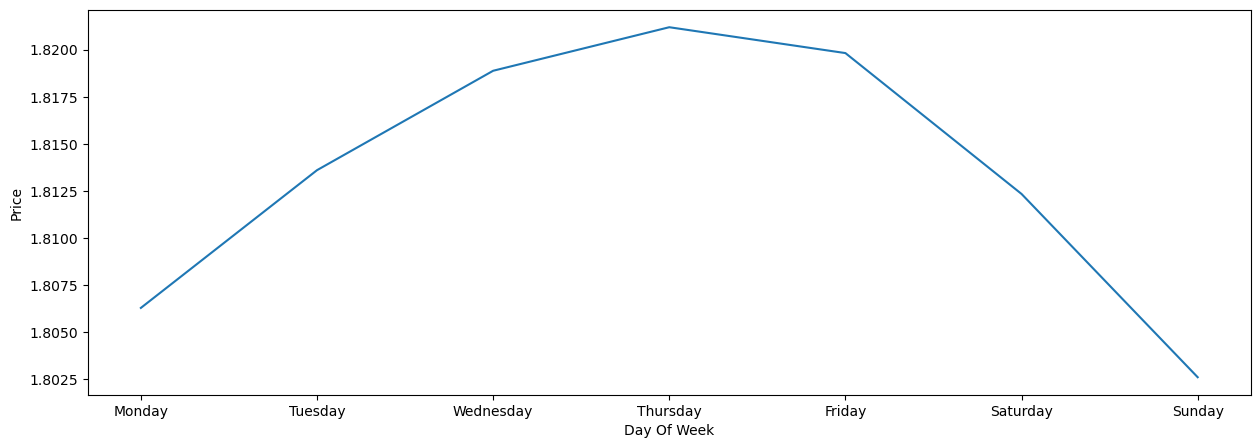

In [19]:
plt.figure(figsize=(15,5))
sns.lineplot(data=mean_price_day_of_week, x="Day Of Week", y="Price")